
With a lamda of 0.0 the value is = 5.00

With a lamda of 0.1 the value is = 5.10

With a lamda of 0.2 the value is = 5.20

With a lamda of 0.3 the value is = 5.30

With a lamda of 0.4 the value is = 5.40

With a lamda of 0.5 the value is = 5.00

With a lamda of 0.6 the value is = 4.60

With a lamda of 0.7 the value is = 4.20

With a lamda of 0.8 the value is = 3.80

With a lamda of 0.9 the value is = 3.40

With a lamda of 1.0 the value is = 3.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.


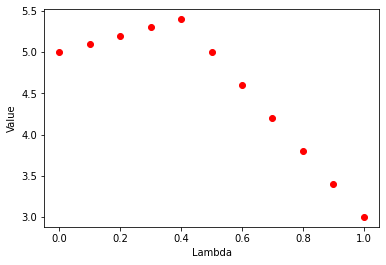

In [4]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

def nn2na(NN):
    # Get every location where exist an arc:
    idxs = np.argwhere(NN)
    # Preallocate NA matrix, dimension is (nodes, arcs)
    NA = np.zeros([NN.shape[0], idxs.shape[0]]).astype(int)
    C = np.zeros(NA.shape[1])
    # Loop in every arc, complete from (1) to (-1)
    for i, arc in enumerate(idxs):
        # Node arc:
        NA[arc[0], i] = 1 # From
        NA[arc[1], i] = -1 # To

    arc_idxs = [(arc[0], arc[1]) for arc in idxs]

    return NA, arc_idxs


#importing the data - NN matrix

NN = np.array([[0, 1, 1, 0, 0, 0],   
               [0, 0, 0, 1, 0, 1],   
               [0, 0, 0, 0, 1, 0],   
               [0, 0, 0, 0, 0, 1],   
               [0, 0, 0, 0, 0, 1],   
               [0, 0, 0, 0, 0, 0]])  
                     
#formulation of LP
Aeq, arcs = nn2na(NN) 
T_a = np.array([[3, 1, 3, 1, 3, 3, 5]])
beq = [1, 0, 0, 0, 0, -1]
T_b = 8
C = np.array([2, 1, 2, 5, 2, 1, 2])

bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])

#lamda manual search
lam = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

def new_c(lam):
    return C + lam * T_a[0]


L = np.zeros(lam.size)
for j in range(lam.size):
    Cm = new_c(lam[j])
    #OPTIMIZE:
    res = linprog(Cm, A_eq=Aeq, b_eq=beq, bounds=bounds, method='revised simplex')
    print("\nWith a lamda of",lam[j], "the value is =" , format(res.fun - lam[j] * T_b,'.2f'))
    L[j] = res.fun - lam[j] * T_b

plt.scatter(lam, L, color='r')
plt.xlabel("Lambda")
plt.ylabel("Value")
plt.show()